In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# First, look at everything.
from subprocess import check_output


## Instrucciones para correr la notebook en colab



1. Abrir el panel de archivos
2. Subir al mismo el dataset de [spotify](https://drive.google.com/drive/folders/1JoqW_nmZBKRHFbbRlFjx43BslIw13Z9c) y [grad-students](https://github.com/fivethirtyeight/data/blob/master/college-majors/grad-students.csv)
3. Asegurarse que los mismos esten en la carpeta contents

In [2]:
#  Pick a Dataset you might be interested in.
#  Say, all airline-safety files...

#import zipfile

#Dataset = "college-majors"

# Will unzip the files so that you can see them..
#with zipfile.ZipFile("../input/data/"+Dataset+".zip","r") as z:
#    z.extractall(".")

In [3]:
#from subprocess import check_output
#print(check_output(["ls", "college-majors"]).decode("utf8"))

### Descripcion de cada una de las variables del dataset

---

###### Aclaraciones

- Las variables descriptas cuyo nombre comienza por \*  implica que la definicion del tipo de variable y la descripcion
de la misma pueden darse de igual manera para las variables del dataset que se obtengan reemplazando \* por **Grad** o bien por **Nongrad**
- Se entiende por Grad, personas que poseen un titulo de posgrado *(master o doctorado)*. Segun la definicion de [Graduate student](https://educationusa.state.gov/your-5-steps-us-study/research-your-options/graduate/what-graduate-student)
- Se entiende por Nongrad, personas que poseen unicamente un *titulo de grado*, equivalente a **Undergraduate student**. Segun la definicion de [Undergraduate student](https://educationusa.state.gov/your-5-steps-us-study/research-your-options/undergraduate/what-us-undergraduate-student)

---

-   Major_code:
    - Variable categorica
    - Codigo de la carrera de grado
-   Major:
    - Variable categorica
    - Nombre de la carrera de grado
-   Major_category:
    - Variable categorica
    - Disciplina de la carrera de grado: ej. Ingenieria
-   \*_total
    - Variable cuantitativa
    - Total de graduados
-   \*_sample_size
    - Variable cuantitativa
    - Tamaño de la muestra
-   \*_employed
    - Variable cuantitativa
    - Total de graduados con empleo
-   \*_full_time_year_round
    - Variable cuantitativa
    - Total de graduados con empleo full time durante al menos 35 semanas
-   \*_unemployed
    - Variable cuantitativa
    - Total de graduados sin empleo
-   \*_unemployment_rate
    - Variable cuantitativa
    - Tasa de desempleo de los graduados (\*\_unemployed / (\*\_unemployed + \*\_employed)
-   \*_median
    - Variable cuantitativa
    - Mediana del ingreso anual de los graduados (en dolares)
-   \*_P25
    - Variable cuantitativa
    - Cuantil 25 del ingreso anual de los graduados (en dolares)
-   \*_P75
    - Variable cuantitativa
    - Cuantil 75 del ingreso anual de los graduados (en dolares)
-   Grad_share
    - Variable cuantitativa
    - Porcentaje de graduados de la carrera de grado que poseen un titulo de posgrado (master/doctorado)
-   Grad_premium
    - Variable cuantitativa
    - pocentaje extra de ingresos medios de graduados de esa carrera con titulo de master o doctorado:
        - (Grad_median / Nongrad_median) - 1

## Resumen del dataset

A continuacion se muestran las primeras 5 entradas del set de datos:
 

In [4]:
# There's only one file above...we'll select it.
# Para correr en kaggle descomentar 
#students=pd.read_csv(Dataset+"/grad-students.csv") #Comentado 12/4 para poder

# Para correr en Colab descomentar
students = pd.read_csv('/content/grad-students.csv')
students.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


A continuacion, se muestran las ultimas 5 entradas del set de datos

In [5]:
students.tail()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
168,5203,COUNSELING PSYCHOLOGY,Psychology & Social Work,51812,724,38468,28808,1420,0.035600,50000.0,...,16781,12377,8502,835,0.063200,40000.0,25000,50000.0,0.755354,0.250000
169,5202,CLINICAL PSYCHOLOGY,Psychology & Social Work,22716,355,16612,12022,782,0.044958,70000.0,...,6519,4368,3033,357,0.075556,46000.0,30000,70000.0,0.777014,0.521739
170,6106,HEALTH AND MEDICAL PREPARATORY PROGRAMS,Health,114971,1766,78132,58825,1732,0.021687,135000.0,...,26320,16221,12185,1012,0.058725,51000.0,35000,87000.0,0.813718,1.647059
171,2303,SCHOOL STUDENT COUNSELING,Education,19841,260,11313,8130,613,0.051400,56000.0,...,2232,1328,980,169,0.112892,42000.0,27000,51000.0,0.898881,0.333333
172,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,54159,841,34142,26850,582,0.016761,65000.0,...,4003,3079,2434,0,0.000000,58000.0,45000,79000.0,0.931175,0.120690


## Información de las columnas


A continuación, se muestra la información con info().

Se puede observar el tipo de dato contenido en cada una de las columnas y la cantidad de valores no nulos que posee cada una.

In [ ]:
students.info()

Se muestra el shape del set de datos. Que indica:

- (cantidad de filas, cantidad de columnas).

In [7]:
students.shape

(173, 22)

Mirando la salida de info() y shape, se puede inferir que no hay valores nulos en el set de datos.

### Cantidad de valores nulos por columna

Para comprobar que no hay valores nulos en ninguna de las columnas, se ejecuta el siguiente código:

In [8]:
students.isnull().sum()

Major_code                      0
Major                           0
Major_category                  0
Grad_total                      0
Grad_sample_size                0
Grad_employed                   0
Grad_full_time_year_round       0
Grad_unemployed                 0
Grad_unemployment_rate          0
Grad_median                     0
Grad_P25                        0
Grad_P75                        0
Nongrad_total                   0
Nongrad_employed                0
Nongrad_full_time_year_round    0
Nongrad_unemployed              0
Nongrad_unemployment_rate       0
Nongrad_median                  0
Nongrad_P25                     0
Nongrad_P75                     0
Grad_share                      0
Grad_premium                    0
dtype: int64

Con esto, queda comprobado que no existen valores nulos en ninguna de las columnas del dataset.

# Variables Cualitativas 

## Se muestran los distintos valores existentes respecto a las columnas cualitativas y la cantidad de filas correspondientes a cada uno.

In [ ]:
qualitative_students = students[['Major', 'Major_code', 'Major_category']]
qualitative_students

### Muestra de todos los valores de "Major" y la cantidad de filas asociadas a cada valor.

In [ ]:
qualitative_students['Major'].unique()

Se observa que en la serie Major existen muchos valores únicos por lo que en principio se muestran la cantidad de repeticiones de cada uno de los valores.

In [ ]:
counts = qualitative_students['Major'].value_counts()
counts

A continuación se muestran la cantidad de valores únicos.

In [ ]:
counts.unique()

Dado que existe un único valor para cada uno de las categorias de la serie Major se decide no realizar un gráfico de barras para comparar la cantidad de filas pertenecientes a cada una de estos valores dado que son todos los mismos.

### Muestra de todos los valores de "Major_code" y la cantidad de filas asociadas a cada valor.

In [ ]:
qualitative_students['Major_code'].unique()


In [ ]:
counts = qualitative_students['Major_code'].value_counts()
counts

In [ ]:
counts.unique()

Por las mismas razones que se encuentran en la sección anterior, se decide no realizar comparaciones con el gráfico de barras.

### Muestra de todos los valores de "Major_category" y la cantidad de filas asociadas a cada valor.

In [ ]:
qualitative_students['Major_category'].unique()

In [ ]:
qualitative_students['Major_category'].value_counts()

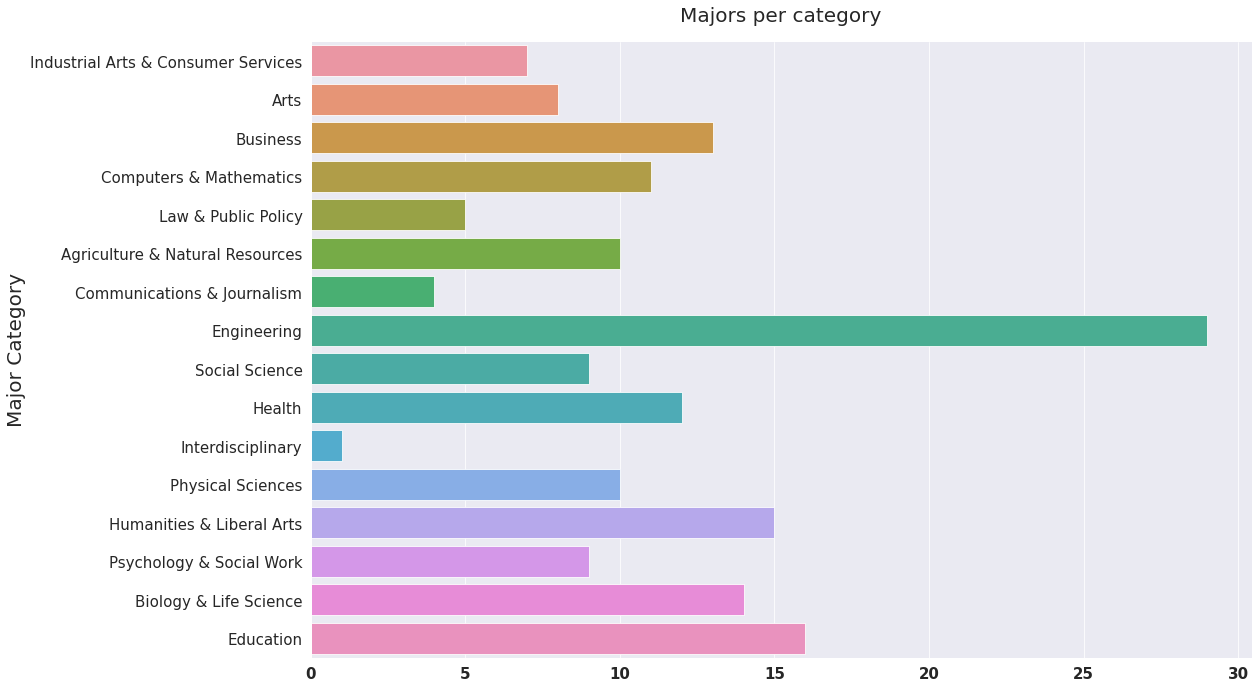

In [18]:
sns.set_context('paper', font_scale=1)

sns.set_style('darkgrid')

fig = sns.catplot(data=qualitative_students, y="Major_category",
                kind="count")

fig.figure.set_size_inches(30, 10)

fig.figure.suptitle("Majors per category", x=0.75, y=1.02, fontsize = 20)

fig.ax.set_ylabel(
    ylabel = "Major Category",
    fontsize = 20,
)

fig.ax.set_yticklabels(fig.ax.get_yticklabels(),
                        fontsize = 15)

fig.ax.set_xlabel(
    xlabel = "",
    fontsize = 20
)

fig.ax.set_xticklabels(fig.ax.get_xticklabels(),
                       fontsize = 15,
                       fontweight = 'bold'
)

plt.show()

## **¿Es posible realizar este gráfico con un histograma?**


No es posible realizar un histograma en ninguno de los tres casos, ya que el histograma se puede realizar sobre variables cuantitativas pero estamos utilizando variables cualitativas.

## **Explique las diferencias entre estos dos tipos de gráficos.**

- El histograma se utiliza para mostrar la distribución de datos numéricos mientras que el gráfico de barras se puede utilizar para comparar distintos datos categoricos (no necesariamente frecuencias).
- El histograma se utiliza para mostrar la distribución de variables no discretas, en cambio para variables discretas se utiliza el gráfico en barras.
- En el caso de un gráfico de barras, es bastante común reorganizar los bloques, de mayor a menor. Pero con el histograma, esto no se puede hacer, ya que se muestran en las secuencias de las clases.

# Variables Cuantitativas

## 1. Medidas de resumen


A continuación se realizan sobre variables de este tipo los calculos de las siguientes medidas de resumen y se arma un nuevo dataframe con los mismos.

- Media
- Mediana
- Moda
- Primer y tercer cuartil
- Rango


In [ ]:
description = students.describe()
description.drop(["count", "std", "min", "max"], inplace=True, axis='index')
description

In [20]:
#agrego iqr
description = description.transpose()
description["iqr"] = description["75%"] - description["25%"]

description.rename(columns={'50%': 'median'}, inplace=True)

In [ ]:
modes = students.mode(axis='index', numeric_only=True).transpose()

description["mode"] = modes[0]

description = description.transpose().drop("Major_code", axis='columns')

description

## 2. Correlación de atributos

### Exploración de las variables cuantitativas, tomándolas de a pares utilizando un gráfico scatter_matrix

Las siguientes variables son elegidas para graficarlas de a pares, utilizando scatter plots y en las diagonales histogramas, ya que se considera que representan al dataset y al objetivo del mismo de la forma mas abarcativa. Teniendo en cuenta que el [articulo](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/), que se escribio utilizando el dataset, busca:

1. Aconsejar sobre cuales carreras de grado maximizan los ingresos del graduado comparando las orientaciones de las mismas (Ingenieria, Ciencias Sociales, etc).
2. Analizar las diferencias entre graduados de diferentes sexos.
3. Comparar las diferencias de ingresos segun carrera y grado de estudio (posgrado vs. grado).

Tomando esto en cuenta y sabiendo que el dataset que nos compete es el unico dentro de los datasets de *College-majors* que compara graduados con titulo de grado y posgrado.

##### Se eligen las siguientes variables:

---

- Grad_premium
- Grad_share
- Grad_median
- Nongrad_median
- Grad_unemployment_rate
- Nongrad_unemployment_rate

---

##### Mientras que se descartan, por las razones detalladas a continuacion las variables:

---

- Grad_sample_size y Nongrad_sample_size
    - No se eligen estas variables debido a que no son representativos para el objetivo antes descrito.

- Grad_total y Nongrad_total
    - No se eligen estas variables debido a que estan representadas por la variable *Grad_share*

- Grad_employed/Grad_full_time_year_round y Grad_unemployed
    - No se eligen estas variables por que estan representadas por la variable elegida *Grad_unemployment_rate*

- Nongrad_employed/Nongrad_full_time_year_round y Nongrad_unemployed
    - Igual que en el caso anterior, estas variables estan representadas por la variable analoga *Nongrad_unemployment_rate*

- Cuantiles (Grad_P75, Grad_P25, Nongrad_P75 y Nongrad_P25)
    - No se eligen estas variables debido a que se elige la mediana como modo de representacion de los ingresos de graduados de posgrado y grado.

---

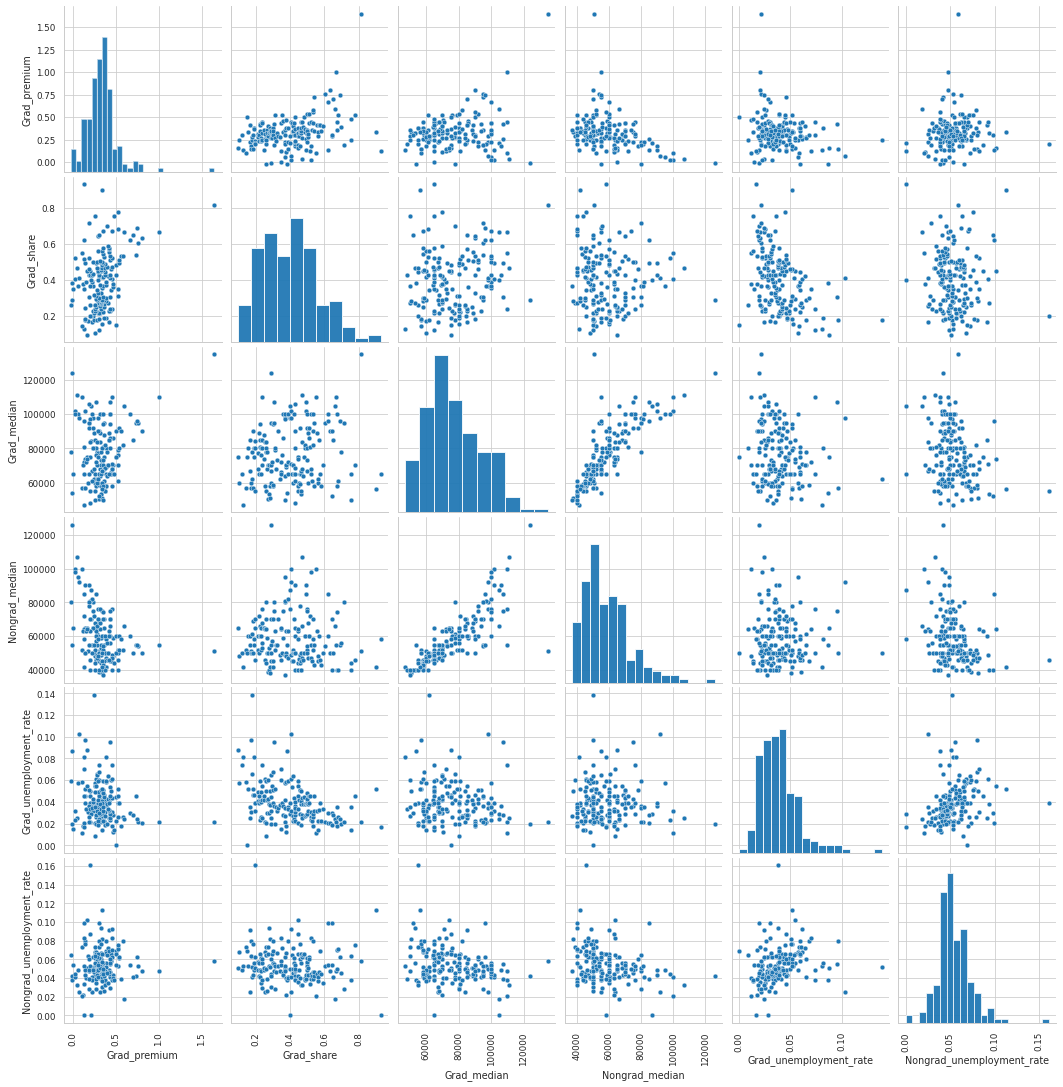

In [22]:
#Gráficos de a pares de variables con Pandas
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1)

vars = ["Grad_premium", "Grad_share", "Grad_median", "Nongrad_median", "Grad_unemployment_rate", "Nongrad_unemployment_rate"]

students_without_col = students[vars]

grid = sns.pairplot(
                    data=students_without_col,
                    vars = vars,
                    kind="scatter"
                    )

grid.map_diag(sns.histplot)


for ax in grid.axes.flat:
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


Entre los graficos, destaca la relacion que tienen las variables Nongrad_median y Grad_median. Se puede observar que a medida que aumenta el salario medio de los estudiantes de grado de una carrera particular, los estudiantes de las mismas que obtienen un titulo de posgrado ganan mas.

### Cálculo de la correlación de Pearson y gráfico de la misma

A continuación se realiza el cálculo de la correlación de Pearson y se grafica la misma en forma de heatmap.

In [ ]:
import seaborn as sns

correlaciones = students_without_col.corr()
display(correlaciones)

sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(20,20))
grf=sns.heatmap(correlaciones,annot=True, linewidths=.5, ax=ax, cmap = sns.color_palette("RdYlGn", as_cmap=True))

Con el fin de poder observar alguna correlación lineal entre variables que no se haya podido observar debido a la reducción de las mismas. Se grafica a continuación un heatmap con las correlaciones entre todas las variables cuantitativas del dataset

In [ ]:
correlaciones = students.corr()
display(correlaciones)

sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(20,20))
grf=sns.heatmap(correlaciones,annot=False, linewidths=.5, ax=ax, cmap = sns.color_palette("RdYlGn", as_cmap=True))

# 3. Visualizaciones


## **Violin Plot**



En el siguiente violin plot compararemos la ganancia media entre los grad y nongrad students de la categoría **Engineering**

In [ ]:
plt.style.use('classic')

#engineering_students = students.drop(students[(students['Major_category'] != 'Engineering')].index)
engineering_students = students.query("Major_category == 'Engineering'")


fig, ax = plt.subplots()
violin_parts = ax.violinplot([engineering_students['Grad_median'], engineering_students['Nongrad_median']])

# Add title

ax.set_title('Ganancia media entre grad y nongrad students de Engineering')

for bp in violin_parts['bodies']:
  bp.set_facecolor('red')
  bp.set_edgecolor('blue')
  bp.set_alpha(0.6)

plt.show()

Facilmente se observa que la mayoría de los nongrad students tienen una ganancia media de 70000, mientras que los grad students tienen una ganancia media de 100000. Cabe aclarar que el máximo de ganancia es más alto en los nongrad students que en los grad students

---

## **Box Plot**



Para el gráfico de boxplots vamos a comparar la cantidad de graduados con un título de major sobre el total de graduados.
Para esto seleccionamos las siguientes major categorys:

- **Engineering**
- **Education**
- **Psychology & Social Work**

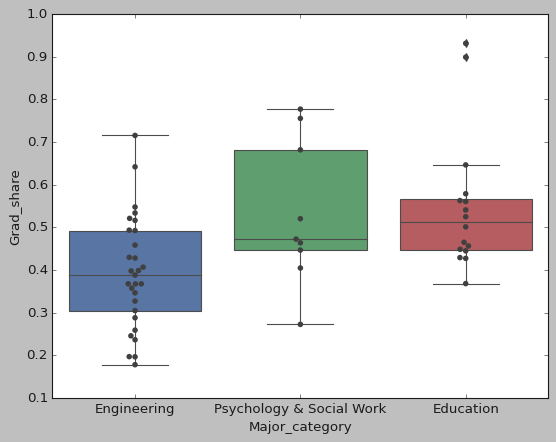

In [26]:
Reduce_students = students.query("Major_category == 'Engineering' or Major_category == 'Education' or Major_category == 'Psychology & Social Work'")

ax = sns.boxplot(x = Reduce_students['Major_category'] , y = Reduce_students['Grad_share'])
#Use swarmplot() to show the datapoints on top of the boxes:
ax = sns.swarmplot(x = Reduce_students['Major_category'],  y = Reduce_students['Grad_share'], data= Reduce_students, color=".25")

plt.show()
# arreglar 23/4

En Engineering, si bien una de las 29 majors tiene un porcentaje alto de grad studens sobre el total de estudiantes (lo destaca el punto máximo de la bluebox) su promedio es menor al de Education y Psychology siendo ésta última la major category con mayor porcentaje de grad de students. También en Education se observan más de un outlier dentro de los datos.

---

## **Histograma**

A continuación compararemos las tasas de desempleo dentro de la major de Ingenieria para los Grad y Nongrad students.

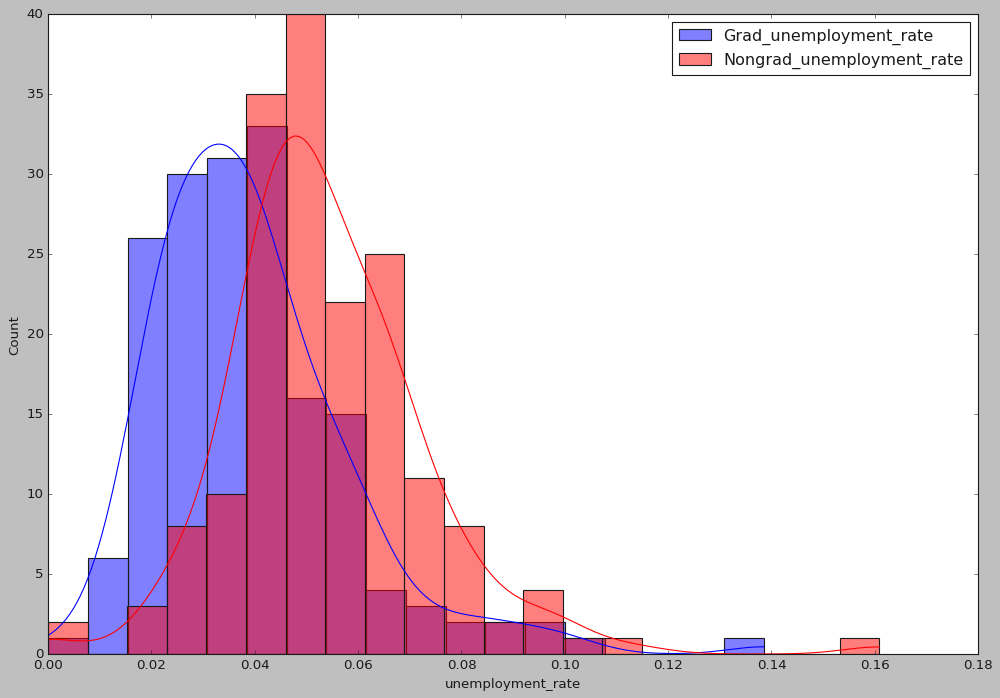

In [55]:
Education_students = students.query("Major_category == 'Engineering'")

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax.set_xlabel('unemployment_rate') 
sns.histplot(data=students['Grad_unemployment_rate'], kde=True, color = 'blue', label = 'Grad_unemployment_rate')
sns.histplot(data=students['Nongrad_unemployment_rate'], kde=True, color ='red', label = 'Nongrad_unemployment_rate')
plt.legend()
plt.show()

Podemos ver que el porcentaje de desempleados es chico para ambos casos, siendo el máximo 16%, observamos que hay más frecuencia entre el 2% y el 4% para los grad students mientras que para los nongrad students la frecuencia de desempleo aumenta entre el 4 y el 8 porciento. De esta manera se ve que hay un mayor porcentaje de desempleados para aquellos estudiantes que no se reciben con una major

---

## **Density Plot**



En el siguiente grafico de densidad compararemos la ganancia media entre los grad students de engineering, que es la categoría que más majors abarca dentro del dataset, contra los grad students de computers & mathematics, siendo este ultimo una categoria que abarca menos de la mitad que engineering.

De esta forma se visualizará mejor la densidad

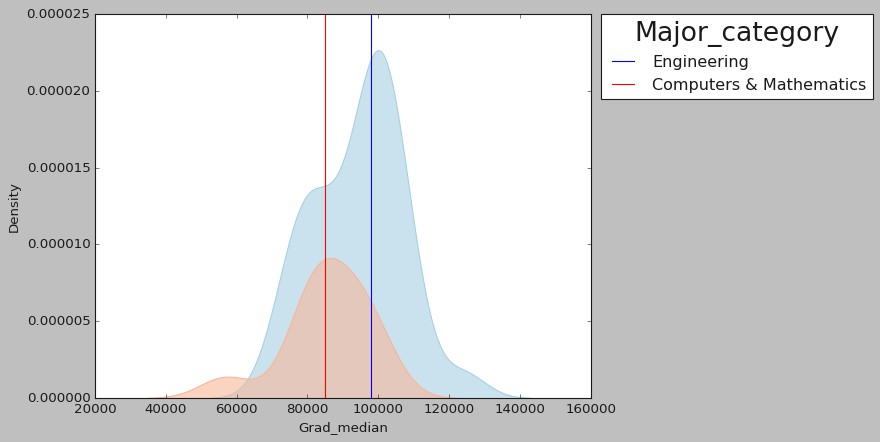

In [56]:
Density_Engineering_vs_Computers = students.query("Major_category == 'Engineering' or Major_category == 'Computers & Mathematics'")

engineering = students.query("Major_category == 'Engineering'")

computers_students = students.query("Major_category == 'Computers & Mathematics'")

plt.axvline(np.median(engineering['Grad_median']), c = "blue")
plt.axvline(np.median(computers_students['Grad_median']), c = "red")

sns.kdeplot(data=Density_Engineering_vs_Computers, x="Grad_median", hue="Major_category", alpha=0.6, fill=True, palette= 'RdBu',legend = True)

# Chequear la media para cada uno y arreglar el legend
plt.legend(bbox_to_anchor = (1.02,1), loc='upper left', borderaxespad=0, title = 'Major_category', labels = ["Engineering","Computers & Mathematics"])
#plt.legend(bbox_to_anchor = (1.02,1),loc= "upper left")
plt.show()


Al haber más majors dentro de la categoria de Engineering hay mayor densidad entre los 60000 y 120000 de ganancia media. Dicho esto, Engineering se extiende tambien hasta los 140000, 20000 más que los pocos grad students de Computers & Mathematics que alcanzan el máximo de ganancia dentro de su categoria

![](https://cdn.discordapp.com/attachments/955607461497282644/963578308862300210/unknown.png)

Observando la imagen y teniendo en cuenta las distintas medias de nuestro gráfico, podemos concluir que tanto para el major category de Engineering como Computers & Mathematics presentan una asimetría negativa.

---

## Gráfico a elección

Para el gráfico a elección decidimos utilizar la librería Plotly (https://plotly.com/)

Vamos a gráficar en un pie chart, el porcentaje de estudiantes, de cada major category, sobre el total de estudiantes.



In [ ]:
#studen_total['Grad_total'].sum() + studen_total['Nongrad_total'].sum()
studen_total = students[['Major_category','Grad_total','Nongrad_total']]
studen_total = studen_total.groupby(['Major_category']).agg({'Grad_total': 'sum', 'Nongrad_total': 'sum'}).reset_index()
studen_total_ = studen_total[['Major_category']]
# Se saca el porcentaje del total de estudiantes por categoria sobre el total de estudiantes del dataset (USA)
studen_total_['Total_students'] = ((studen_total['Grad_total'] + studen_total['Nongrad_total'])* 100)/ (studen_total['Grad_total'].sum() + studen_total['Nongrad_total'].sum())
studen_total_

In [30]:
import plotly.express as px

fig = px.pie(studen_total_, values='Total_students', names='Major_category',
             title='Total de estudiantes por categoria sobre el total de estudiantes de USA')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Se observa facilmente que la major category con mayor cantidad de graduados (tanto Grad como Nongrad students) en USA es Business siguiendole Education.

# **Conclusiones**



Extraer conclusiones a partir de los análisis realizados en los puntos anteriores, y justificar cada conclusión.

Por ejemplo:

¿Se encontró algún tipo de comportamiento particular en alguna variable?


¿Existen variables correlacionadas y por qué? ¿Es esperable o no?

## ¿Se encontró algún tipo de comportamiento particular en alguna variable?


Si bien no sabríamos decir si es un comportamiento particular en las variables, sí encontramos comportamientos no esperables.

Por ejemplo, al empezar a analizar el dataset nos esperabamos que cuantas más carreras (major) tuviera una categoría (major category), más alto fuera la cantidad de alumnos dentro de ésta. Sin embargo, como se puede apreciar con el gráfico de pie-chart, esto no es así. La categoría con más carreras es "Engineering", y sin embargo, las categorías con más alumnos son "Business" y "Education".

También, esperabamos que la major de "Engineering" tuviera el porcentaje más alto de grad-share. Sin embargo, "Psychology" y "Education" la superaron ampliamente, como se puede observar en el box-plot.



## ¿Existen variables correlacionadas y por qué? ¿Es esperable o no?

Al analizar las correlaciones entre variables, mediante por ejemplo el uso de la correlación de Pearson y visualizaciones tales como el heatmap, podemos notar que varias variables están correlacionadas linealmente (observando por ejemplo la cantidad de celdas verdes y rojas). Esto se debe, principalmente, a que el dataset tiene variables que fueron construídas con base en otras variables del mismo dataset.

Lo podemos observar con variables como "grad-share", "grad-premium", "nongrad-median", entre otras.

---

# **Parte 2 - Preguntas de investigación: Spotify**

## Exploración

En primer lugar, se explora el dataset observando las primeras y ultimas filas, el shape del mismo, se hace la descripcion y se muestra la informacion de cada una de las columnas.

In [ ]:
#Para correr en kaggle
#spotify = pd.read_csv('dataset_spotify.csv')

# Para correr en colab
spotify = pd.read_csv('/content/datset_spotify.csv') 

spotify.head()

In [ ]:
spotify.tail()

In [ ]:
spotify.shape

In [ ]:
spotify.describe()

In [ ]:
spotify.info()

A continuacion, se exploran las medias de la popularidad de las canciones segun el genero y de la bailabilidad segun el genero.

In [ ]:
ax = sns.barplot(x="genre", y="popularity", data=spotify)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

Se puede observar, que el genero mas popular es Pop mientras que el menos popular es Opera. Tambien se aprecia que la popularidad de una cancion depende del genero al que pertenece la misma.

In [ ]:
ax = sns.barplot(x="genre", y="danceability", data=spotify)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

En este caso, se puede ver que los generos mas bailables son Hip-Hop, Reggae y Reggaeton mientras que los menos bailables son Opera y Classical. En este caso, tambien se aprecia una dependencia de la bailabilidad segun el genero de la cancion.

## **Preguntas**

1. ¿Qué hace que una canción sea bailable?
2. ¿A qué está ligada la popularidad de una canción?


### **1. ¿Qué hace que una canción sea bailable?**

Comenzamos explorando la relacion de la bailabilidad de una cancion con el resto de las variables cuantitativas del Dataset. Por eso en primer lugar planteamos la correlacion de Pearson visualizandolo en un heatmap.

In [ ]:
correlaciones = spotify.corr()
correlaciones['danceability']

In [ ]:
sns.heatmap(correlaciones[['danceability']])

Observando el grafico vemos que valence, loudness, energy y acousticness tienen una relacion lineal notable con danceability.

Para observar mas claramente la distribucion de las correlaciones planteamos un scatterplot.

In [ ]:
columnas = spotify.columns.to_list()
columnas.remove("danceability")
columnas.remove("genre")

grid = sns.pairplot(data=spotify, y_vars = ["danceability"], x_vars = columnas, hue="genre")

grid.set(xticklabels="", yticklabels="")

plt.show()

Viendo los diferentes graficos, notamos incoherencias con lo que nos dice el coeficiente de Pearson (heatmap) vemos que por ejemplo 'loudness' se acoumulan en a altos valores de loudness con mucha varianza de bailabilidad. Dicho esto el resto de las correlaciones del heatmap no pueden ser descartadas.

Al ver que hay discrepancia decidimos utilizar un metodo de regresion lineal. Esta vez se decidio tener en cuenta todas variables cuantitativas para explicar la bailabilidad de una cancion mediante el analisis cualitativo de los coeficientes.

El metodo de regresion lineal que se utiliza es el de la regresion de Lasso, esto se debe a la que la misma, no solamente tiene por objetivo minimizar la suma suma de los cuadrados minimos de las distancias a la recta, si no que tambien minimiza la norma $l_{1}$. Segun la siguiente expresion:

\begin{equation}
\sum_{i = 0}^{N} (\bar{y}_{i} - y_{i})^2 + \alpha * \sum_{j=0}^{M} |a_{j}|
\end{equation}

Esto implica que aquellas variables cuyos coeficientes no tengan influencia, lineal, sobre la bailabilidad de una cancion, tenderan a valer 0. Mientras que aquellas con mayor influencia tendran un coeficiente distinto de cero.
De esta manera, el objetivo de usar la regresion de Lasso es poder observar de forma grafica y cualitativa la influencia de las diferentes variables cuantitativas sobre la bailabilidad de una cancion.

In [41]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
reducido = spotify.drop(["genre", "danceability"], axis=1)
indices = reducido.columns
variables = reducido.values

target = spotify['danceability'].values.reshape(-1, 1)

In [ ]:
modelo = Lasso(alpha=0.0001, normalize=True) #RMSE + alpha * |SumaCoeficientes|
modelo.fit(variables, target)

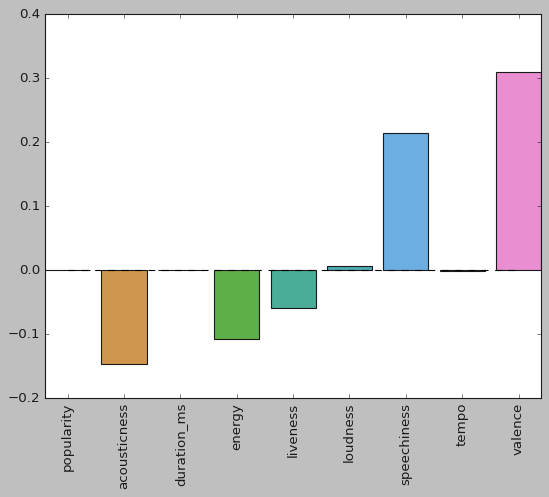

In [43]:

fig, ax = plt.subplots()
_ =sns.barplot(x=indices, y=modelo.coef_, ax=ax)

ax.set_xticklabels(indices, rotation = 90)

ax.plot(indices, [0] * len(indices), color='#000000', linestyle='--')

plt.show()

Viendo esto, cuando se tienen en cuenta todas las variables cuantitativas,observamos que 'loudness' dejo de tener correlacion y speechiness, que antes tenia una correlacion muy baja, ahora destaca entre las demas.

En este caso se puede observar que las variables que mas inferencia tienen con la bailabilidad son valence, speechiness y acousticness. Otras variables que afectan, aunque en menor medida que las anterirores, son energy y liveness.

Por ultimo cabe aclarar que estas relaciones son lineales y cualquier otra posible relacion no se esta teniendo en cuenta en el análisis.



#### **Conclusiones**



Se determino, de forma cualitativa, que la valencia es lo que hace que una cancion sea mas bailable. Dicho esto no es la única variable que afecta la bailabilidad de una canción sino que existen otras variables como speechiness, energy y acousticness.

### **2. ¿A qué está ligada la popularidad de una canción?**

Analizamos la popularidad de la misma manera en la que antes se analizó la bailabilidad, buscando correlaciones lineales mediante el uso de Lasso.

In [ ]:
columnas = spotify.columns.to_list()
columnas.remove("popularity")
columnas.remove("genre")

grid = sns.pairplot(data=spotify, y_vars = ["popularity"], x_vars = columnas, hue="genre")

grid.set(xticklabels="", yticklabels="")

plt.show()

In [ ]:
correlaciones = spotify.corr()
correlaciones['popularity']

In [ ]:
sns.heatmap(correlaciones[['popularity']])

In [ ]:
reducido = spotify.drop(["genre", "popularity"], axis=1)
indices = reducido.columns
variables = reducido.values

target = spotify['popularity'].values.reshape(-1, 1)
indices

In [47]:
modelo = Lasso(alpha=0.0001, normalize=True) #RMSE + alpha * |SumaCoeficientes|

In [ ]:
modelo.fit(variables, target)
modelo.score(variables, target)

In [ ]:
fig, ax = plt.subplots()
_ =ax.plot(indices, modelo.coef_)

ax.set_xticklabels(indices, rotation = 90)

ax.plot(indices, [0] * len(indices), color='#000000', linestyle='--')

In [ ]:
fig, ax = plt.subplots()
_ =sns.barplot(x=indices, y=modelo.coef_, ax=ax)

ax.set_xticklabels(indices, rotation = 90)

ax.plot(indices, [0] * len(indices), color='#000000', linestyle='--')

plt.show()

De la misma forma, vemos que la correlación de Pearson nos muestra que hay una correlación lineal entre "popularity" con "loudness". Pero, al profundizar sobre esto con una correlación lineal utilizando Lasso, esta correlación ya no aparece.

Tras el análisis anterior, podemos afirmar, a través de la relación lineal, que lo que hace que una canción sea popular es la acousticness, la bailabilidad, la energía, liveness, y speechiness.

Además, se puede ver que si bien en el análisis anterior vimos que la popularidad no tenía correlación lineal con la bailabilidad, concluyendo que si una canción es popular no influye en su bailabilidad, con este nuevo análisis podemos ver que sí sucede de manera inversa: si una canción es bailable, tiene grandes probabilidades de ser popular.